In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
%cd ..

/nfs/homedirs/fuchsgru/MastersThesis


In [3]:
import model.normalizing_flow
import plot.density

In [46]:
# Create a multimodal distribution
D = 64
n = 20
mode1 = torch.distributions.MultivariateNormal(
                torch.tensor([1.0] * D), 
                covariance_matrix=torch.diag(torch.tensor([.6] * D)), 
                validate_args=False
    )
mode2 = torch.distributions.MultivariateNormal(
                torch.tensor([-0.3] * D), 
                covariance_matrix=torch.diag(torch.tensor([.1] * D)), 
                validate_args=False
    )
mode3 = torch.distributions.MultivariateNormal(
                torch.tensor([0, 1.2] * (D // 2)), 
                covariance_matrix=torch.diag(torch.tensor([.3] * D)), 
                validate_args=False
    )
x = torch.cat([
    mode1.rsample((n,)),
    mode2.rsample((n,)),
    mode3.rsample((n,)),
], 0).float()

In [47]:
y = torch.tensor([0] * n + [1] * n + [2] * n).long()

In [48]:
def modes_log_density(x):
    probs = torch.stack([mode1.log_prob(x), mode2.log_prob(x), mode3.log_prob(x)])
    return torch.logsumexp(probs, 0)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

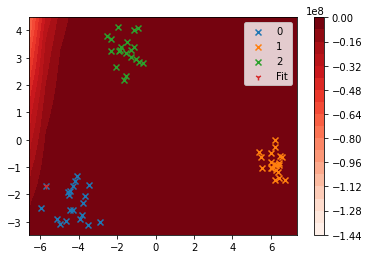

In [62]:
flow = model.normalizing_flow.NormalizingFlow('maf', 10, D, seed=1337, num_hidden=2)
flow.fit(x, weights = torch.tensor([2.0] * n + [0.0005] * n + [1.0] * n).float(), iterations=1000)
plot.density.plot_density(x[:1], x, flow, y, {i : str(i) for i in range(3)}, 
                seed=1337, bins=20, levels=20, dimensionality_reduction='pca', num_samples=50000,
            sampling_stragey = 'random')

In [61]:
list(flow.xflow.parameters())

[Parameter containing:
 tensor([[-0.1903, -0.0011,  0.0308,  ..., -0.0999, -0.1040,  0.0090],
         [ 0.1731, -0.1189, -0.1185,  ..., -0.1009,  0.0120,  0.0776],
         [ 0.1335,  0.1668,  0.1332,  ..., -0.0786, -0.0115, -0.0951],
         ...,
         [-0.1086,  0.0992, -0.1389,  ..., -0.0127, -0.0023, -0.0313],
         [-0.0287, -0.1384,  0.0136,  ...,  0.0576, -0.0714,  0.0551],
         [-0.0446,  0.0489, -0.0346,  ..., -0.1152, -0.1062,  0.0167]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0356, -0.0035,  0.0398, -0.1358, -0.0774,  0.1550, -0.0397, -0.0198,
          0.0962,  0.1104, -0.0357,  0.1005, -0.0346,  0.0831, -0.0016,  0.0854,
          0.0235,  0.0902, -0.0772,  0.0132,  0.0922, -0.0578, -0.0737,  0.0521,
          0.0835, -0.0687,  0.0031,  0.0802, -0.0655,  0.1204,  0.0176,  0.0517,
         -0.0637, -0.0849,  0.1208, -0.0974,  0.0895,  0.1733,  0.0417, -0.0497,
          0.0148,  0.1072, -0.0045,  0.0197,  0.0994, -0.0510, -0.0479, -0.1211

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

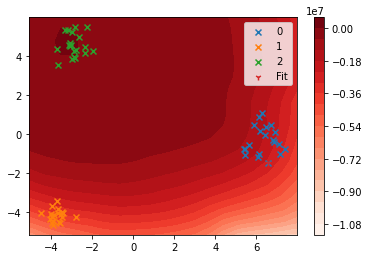

In [41]:
flow = model.normalizing_flow.NormalizingFlow('maf', 10, D, seed=1337, num_hidden=2)
flow.fit(x[2*n:], iterations=50)
plot.density.plot_density(x[:1], x, flow, y, {i : str(i) for i in range(3)}, 
                seed=1337, bins=20, levels=20, dimensionality_reduction='pca', num_samples=50000,
            sampling_stragey = 'random')

In [10]:
flow2 = model.normalizing_flow.NormalizingFlow('maf', 10, D, seed=1337, num_hidden=2)
flow2.fit(x[10:20], iterations=100)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

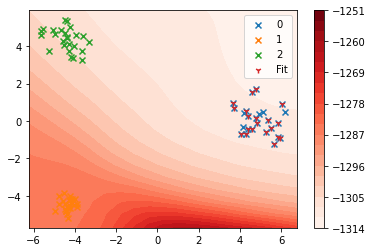

In [11]:
plot.density.plot_density(x[:20], x, flow2, y, {i : str(i) for i in range(3)}, 
                seed=1337, bins=20, levels=20, dimensionality_reduction='pca', num_samples=50000,
            sampling_stragey = 'random')

In [8]:
flow3 = model.normalizing_flow.NormalizingFlow('maf', 10, D, seed=1337, num_hidden=2)
flow3.fit(x[10:20], iterations=100)

tensor([-96.5702, -95.5415, -96.4582, -91.7289, -92.4025, -91.5679, -93.3704,
        -92.5389, -98.2436, -90.0349])